In [1]:
using Turing
using LimberJack
using CSV
using NPZ
using Plots
using FITSIO
using Plots
using LinearAlgebra
using Distributed

In [2]:
cl_path1 = "../data/DESY1_cls/DESgc_DESgc/"
cl_path2 = "../data/DESY1_cls/DESgc_DESwl/"
cl_path3 = "../data/DESY1_cls/DESwl_DESwl/"
cov_path = "../data/DESY1_cls/covs/"
datas = [Data("DESgc", "DESgc", 0, 0, cl_path=cl_path1, cov_path=cov_path),
         Data("DESgc", "DESgc", 1, 1, cl_path=cl_path1, cov_path=cov_path),
         Data("DESgc", "DESgc", 2, 2, cl_path=cl_path1, cov_path=cov_path),
         Data("DESgc", "DESgc", 3, 3, cl_path=cl_path1, cov_path=cov_path),
         Data("DESgc", "DESgc", 4, 4, cl_path=cl_path1, cov_path=cov_path),   
         Data("DESgc", "DESwl", 0, 0, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 0, 1, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 0, 1, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 0, 2, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 0, 3, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 4, 0, cl_path=cl_path2, cov_path=cov_path),
         Data("DESgc", "DESwl", 1, 1, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 1, 2, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 1, 3, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 4, 1, cl_path=cl_path2, cov_path=cov_path),
         Data("DESgc", "DESwl", 2, 2, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 2, 3, cl_path=cl_path2, cov_path=cov_path),
         #Data("DESgc", "DESwl", 4, 2, cl_path=cl_path2, cov_path=cov_path),
         Data("DESgc", "DESwl", 3, 3, cl_path=cl_path2, cov_path=cov_path)]; #,
         #Data("DESgc", "DESwl", 4, 3, cl_path=cl_path2, cov_path=cov_path)
         #Data("DESwl", "DESwl", 0, 0, cl_path=cl_path3, cov_path=cov_path),
         #Data("DESwl", "DESwl", 1, 1, cl_path=cl_path3, cov_path=cov_path),
         #Data("DESwl", "DESwl", 2, 2, cl_path=cl_path3, cov_path=cov_path),
         #Data("DESwl", "DESwl", 3, 3, cl_path=cl_path3, cov_path=cov_path)]; 
Nzs = [Nz(1), Nz(2), Nz(3), Nz(4), Nz(5)]
Cls_metas = Cls_meta(datas, covs_path=cov_path);
cov_tot = Cls_metas.cov_tot;
data_vector = Cls_metas.data_vector;

["DESgc__0_DESgc__0_DESgc__0_DESgc__0", "DESgc__0_DESgc__0_DESgc__1_DESgc__1", "DESgc__0_DESgc__0_DESgc__2_DESgc__2", "DESgc__0_DESgc__0_DESgc__3_DESgc__3", "DESgc__0_DESgc__0_DESgc__4_DESgc__4", "DESgc__0_DESgc__0_DESgc__0_DESwl__0", "DESgc__0_DESgc__0_DESgc__1_DESwl__1", "DESgc__0_DESgc__0_DESgc__2_DESwl__2", "DESgc__0_DESgc__0_DESgc__3_DESwl__3", "DESgc__1_DESgc__1_DESgc__1_DESgc__1", "DESgc__1_DESgc__1_DESgc__2_DESgc__2", "DESgc__1_DESgc__1_DESgc__3_DESgc__3", "DESgc__1_DESgc__1_DESgc__4_DESgc__4", "DESgc__1_DESgc__1_DESgc__0_DESwl__0", "DESgc__1_DESgc__1_DESgc__1_DESwl__1", "DESgc__1_DESgc__1_DESgc__2_DESwl__2", "DESgc__1_DESgc__1_DESgc__3_DESwl__3", "DESgc__2_DESgc__2_DESgc__2_DESgc__2", "DESgc__2_DESgc__2_DESgc__3_DESgc__3", "DESgc__2_DESgc__2_DESgc__4_DESgc__4", "DESgc__2_DESgc__2_DESgc__0_DESwl__0", "DESgc__2_DESgc__2_DESgc__1_DESwl__1", "DESgc__2_DESgc__2_DESgc__2_DESwl__2", "DESgc__2_DESgc__2_DESgc__3_DESwl__3", "DESgc__3_DESgc__3_DESgc__3_DESgc__3", "DESgc__3_DESgc__3_DESgc

In [3]:
isposdef(cov_tot)

true

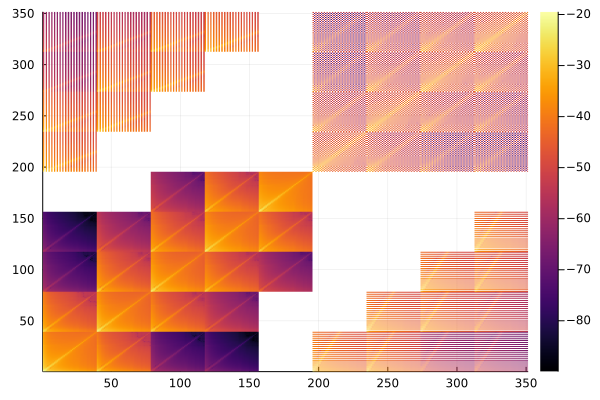

In [4]:
heatmap(1:size(cov_tot,1), 1:size(cov_tot,2), log.((cov_tot.^2).^0.5))

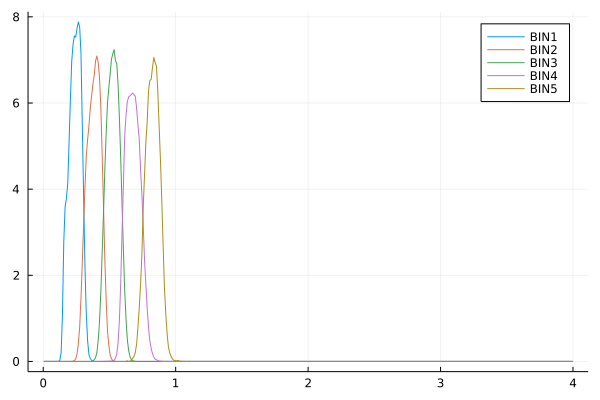

In [5]:
plot(Nzs[1].zs, Nzs[1].nz, label="BIN1")
plot!(Nzs[2].zs, Nzs[2].nz, label="BIN2")
plot!(Nzs[3].zs, Nzs[3].nz, label="BIN3")
plot!(Nzs[4].zs, Nzs[4].nz, label="BIN4")
plot!(Nzs[5].zs, Nzs[5].nz, label="BIN5")

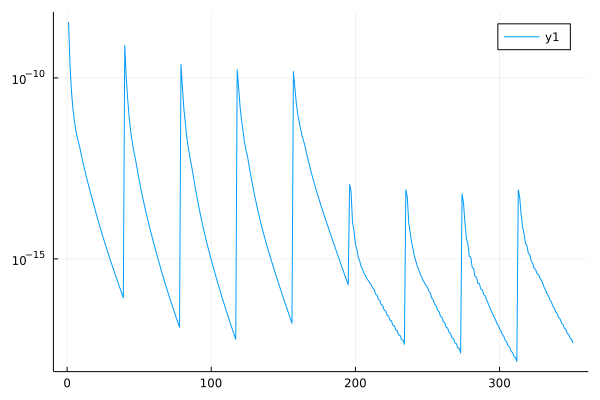

In [6]:
plot(diag(cov_tot), yaxis=:log)

In [ ]:
@model function model(data_vector)
    Ωm ~ Uniform(0.2, 0.3)
    h ~ Uniform(0.6, 0.8)
    s8 ~ Uniform(0.7, 1.0)
    
    b1 ~ Uniform(1.0, 3.0)
    b2 ~ Uniform(1.0, 3.0)
    b3 ~ Uniform(1.0, 3.0)
    b4 ~ Uniform(1.0, 3.0)
    b5 ~ Uniform(1.0, 3.0)
    
    nuisances = Dict("b1" => b1,
                     "b2" => b2,
                     "b3" => b3,
                     "b4" => b4,
                     "b5" => b5)
    
    cosmology = LimberJack.Cosmology(Ωm, 0.05, h, 0.96, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    
    theory = Theory(cosmology, Cls_metas, Nzs, nuisances).Cls
    data_vector ~ MvNormal(theory, cov_tot)
end;

iterations = 50
step_size = 0.005
samples_per_step = 10
cores = 4

# Start sampling.
folpath = "../chains"
folname = string("DES_full_test_", "stpsz_", step_size, "_smpls_", samples_per_step)
folname = joinpath(folpath, folname)
if isdir(folname)
    println("Folder already exists")
    if isfile(joinpath(folname, "chain.jls"))
        println("Restarting from past chain")
        past_chain = read(joinpath(folname, "chain.jls"), Chains)
        new_chain = sample(model(data_vector), HMC(step_size, samples_per_step), iterations,
                           progress=true; save_state=true, resume_from=past_chain)
    end
else
    mkdir(folname)
    println("Created new folder")
    new_chain = sample(model(data_vector), HMC(step_size, samples_per_step),
                iterations, progress=true; save_state=true)
end

info = describe(new_chain)[1]
fname_info = string("info.csv")
CSV.write(joinpath(folname, fname_info), info)


fname_jls = string("chain.jls")
write(joinpath(folname, fname_jls), new_chain)
    
fname_csv = string("chain.csv")
CSV.write(joinpath(folname, fname_csv), new_chain)



In [ ]:
@model function model(data_vector)
    Ωm ~ Uniform(0.2, 0.3)
    h ~ Uniform(0.6, 0.8)
    s8 ~ Uniform(0.7, 1.0)
    cosmology = LimberJack.Cosmology(Ωm, 0.05, h, 0.96, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    theory = Theory(cosmology, Cls_metas, Nzs).Cls
    data_vector ~ MvNormal(theory, cov_tot)
end;

iterations = 500

# Start sampling.
folpath = "../chains"
folname = string("DES_full_test_MH")
folname = joinpath(folpath, folname)
if isdir(folname)
    println("Folder already exists")
    if isfile(joinpath(folname, "chain.jls"))
        println("Restarting from past chain")
        past_chain = read(joinpath(folname, "chain.jls"), Chains)
        new_chain = sample(model(data_vector), MH(), iterations,
                           progress=true; save_state=true, resume_from=past_chain)
    end
else
    mkdir(folname)
    println("Created new folder")
    new_chain = sample(model(data_vector), MH(), iterations,
                       progress=true; save_state=true)
end

info = describe(new_chain)[1]
fname_info = string("info.csv")
CSV.write(joinpath(folname, fname_info), info)


fname_jls = string("chain.jls")
write(joinpath(folname, fname_jls), new_chain)
    
fname_csv = string("chain.csv")
CSV.write(joinpath(folname, fname_csv), new_chain)

